# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
unique_cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in unique_cities:
        unique_cities.append(city)

# Print the city count to confirm sufficient count
len(unique_cities)

614

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# If reposponse OKAY, then save json to cityweather list.
cityweather = []
print('Beginning Data Retrieval')
print('-' * 31)

for i, c in enumerate(unique_cities):
    base_url = 'http://api.openweathermap.org/data/2.5/weather?'
    r = requests.get(f'{base_url}q={c}&appid={api_key}&units=imperial')
    if r.status_code == 200:
        print(f'Processing Record {i:3d} of {len(unique_cities)} | {c.title()}')
        cityweather.append(r.json())
    else:
        print('City not found. Skipping...')
    
print('-' * 31)
print('Data Retrieval Complete')     
print('-' * 31)

Beginning Data Retrieval
-------------------------------
Processing Record   0 of 614 | Kovdor
Processing Record   1 of 614 | Taoudenni
Processing Record   2 of 614 | Atuona
Processing Record   3 of 614 | Padang
Processing Record   4 of 614 | Ribeira Grande
Processing Record   5 of 614 | Antofagasta
Processing Record   6 of 614 | Jamestown
Processing Record   7 of 614 | Miles City
Processing Record   8 of 614 | Puerto Ayora
Processing Record   9 of 614 | Sao Joao Da Barra
Processing Record  10 of 614 | Hermosillo
Processing Record  11 of 614 | Tasiilaq
Processing Record  12 of 614 | Fukue
Processing Record  13 of 614 | Hermanus
Processing Record  14 of 614 | Bethel
Processing Record  15 of 614 | Severo-Kurilsk
Processing Record  16 of 614 | Souillac
Processing Record  17 of 614 | Sur
Processing Record  18 of 614 | Kasongo-Lunda
Processing Record  19 of 614 | Kapaa
Processing Record  20 of 614 | Iqaluit
Processing Record  21 of 614 | Oktyabrskoye
Processing Record  22 of 614 | Presidenc

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
data = pd.DataFrame(cityweather)
data.head(1)

,coord,weather,base,main,wind,snow,clouds,dt,sys,timezone,id,name,cod,visibility,rain
0,"{'lon': 30.47, 'lat': 67.56}","[{'id': 600, 'main': 'Snow', 'description': 'l...",model,"{'temp': 16.32, 'feels_like': 8.8, 'temp_min':...","{'speed': 3.78, 'deg': 93}",{'3h': 0.56},{'all': 100},1576895073,"{'country': 'RU', 'sunrise': 0, 'sunset': 0}",10800,543508,Kovdor,200,NaN,NaN


In [5]:
# Select only City, Cloudiness, Country, Date, Humidity,
# Latitude, Longitude, Max Temperature, and Wind Speed data.
cities = pd.DataFrame({
    'City': data['name'],
    'Cloudiness': [d['all'] for d in data['clouds']],
    'Country': [s['country'] for s in data['sys']],
    'Date': data['dt'],
    'Humidity': [m['humidity'] for m in data['main']],
    'Lat': [c['lat'] for c in data['coord']],
    'Lng': [c['lon'] for c in data['coord']],
    'Max Temp': [m['temp_max'] for m in data['main']],
    'Wind Speed': [m['speed'] for m in data['wind']],
})
cities.to_csv('data/cities.csv')
cities.count()

City          547
Cloudiness    547
Country       547
Date          547
Humidity      547
Lat           547
Lng           547
Max Temp      547
Wind Speed    547
dtype: int64

In [6]:
cities.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Kovdor,100,RU,1576895073,96,67.56,30.47,16.32,3.78
1,Taoudenni,0,ML,1576895073,36,22.68,-3.98,55.80,5.93
2,Atuona,4,PF,1576895073,67,-9.80,-139.03,81.10,10.51
3,Padang,91,ID,1576895073,66,-0.92,100.36,80.56,1.86
4,Ribeira Grande,40,PT,1576895073,59,38.52,-28.70,62.60,29.97


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

-11.42857142857143


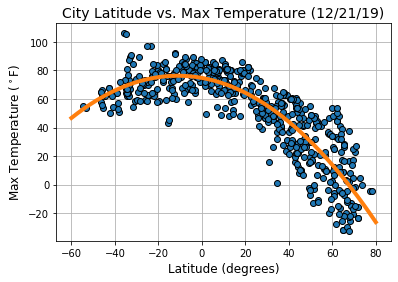

In [16]:
# Save date display as MM/DD/YY
fmt_dt = pd.to_datetime(cities['Date'][0], unit='s')
fmt_dt = fmt_dt.strftime('%m/%d/%y')

# Plot for lat vs max temp
plt.plot(cities['Lat'], cities['Max Temp'], 'o', markeredgecolor='k')

# Fit parabola to data
z = np.polyfit(cities['Lat'], cities['Max Temp'], 2)
x = np.linspace(-60, 80)
y = z[0] * pow(x, 2) + z[1] * pow(x, 1) + z[2]
print(x[np.argmax(y)])
plt.plot(x, y, lw=4)

plt.title(f'City Latitude vs. Max Temperature ({fmt_dt})', size=14)
plt.xlabel('Latitude (degrees)', size=12)
plt.ylabel(r'Max Temperature ($^\circ$F)', size=12)
plt.grid()
plt.savefig('images/lat-vs-temp.png')

#### Latitude vs. Humidity Plot

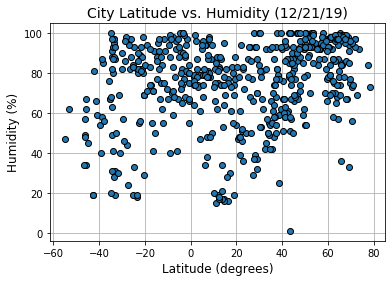

In [8]:
plt.plot(cities['Lat'], cities['Humidity'], 'o', markeredgecolor='k')
plt.title(f'City Latitude vs. Humidity ({fmt_dt})', size=14)
plt.xlabel('Latitude (degrees)', size=12)
plt.ylabel('Humidity (%)', size=12)
plt.grid()
plt.savefig('images/lat-vs-hum.png')

#### Latitude vs. Cloudiness Plot

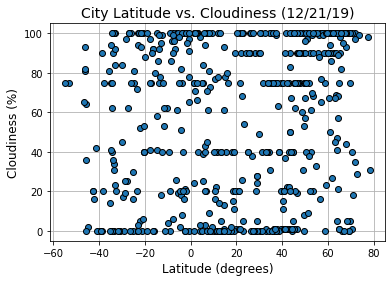

In [9]:
plt.plot( cities['Lat'], cities['Cloudiness'], 'o', markeredgecolor='k')
plt.title(f'City Latitude vs. Cloudiness ({fmt_dt})', size=14)
plt.xlabel('Latitude (degrees)', size=12)
plt.ylabel('Cloudiness (%)', size=12)
plt.grid()
plt.savefig('images/lat-vs-cloud.png')

#### Latitude vs. Wind Speed Plot

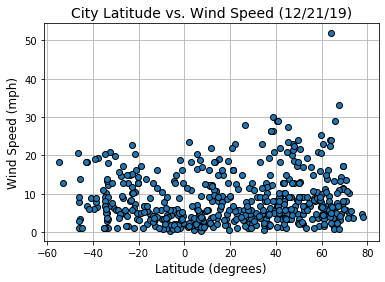

In [10]:
plt.plot(cities['Lat'], cities['Wind Speed'], 'o', markeredgecolor='k')
plt.title(f'City Latitude vs. Wind Speed ({fmt_dt})', size=14)
plt.xlabel('Latitude (degrees)', size=12)
plt.ylabel('Wind Speed (mph)', size=12)
plt.grid()
plt.savefig('images/lat-vs-speed.png')